In [77]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
img_path = "./output/cropped_frame.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
copy = img.copy()

copy = cv2.blur(copy, (5, 5))# blur
copy_lab = cv2.cvtColor(copy, cv2.COLOR_BGR2LAB) # convert to LAB
copy_l, copy_a, copy_b = cv2.split(copy_lab)


In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold using OTSU
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [19]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

In [39]:
ret, markers = cv2.connectedComponents(opening)

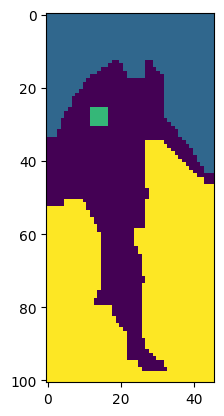

In [40]:

plt.imshow(markers)

In [88]:
img_path = "./output/cropped_frame.jpg"
img = cv2.imread(img_path)

In [89]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Otsu's method for thresholding
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [90]:
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours
# contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [93]:
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask to draw the desired contours
inner_region_mask = np.zeros_like(mask)

# Draw the contours onto the blank mask
cv2.drawContours(inner_region_mask, contours, -1, (255), thickness=cv2.FILLED)

# Subtract the inner region mask from the original mask to get the desired region
desired_region_mask = cv2.bitwise_and(mask, cv2.bitwise_not(inner_region_mask))

# Find contours in the desired region mask
desired_contours, _ = cv2.findContours(desired_region_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours of the desired region on the original image for visualization
outlined_image = image.copy()
cv2.drawContours(outlined_image, desired_contours, -1, (0, 255, 0), cv2.FILLED)

array([[[ 88, 142, 105],
        [ 88, 142, 105],
        [ 85, 142, 103],
        ...,
        [ 82, 138, 103],
        [ 84, 141, 103],
        [ 85, 142, 104]],

       [[ 88, 142, 105],
        [ 88, 142, 105],
        [ 86, 143, 104],
        ...,
        [ 82, 138, 103],
        [ 83, 140, 102],
        [ 84, 141, 103]],

       [[ 87, 141, 104],
        [ 87, 141, 104],
        [ 87, 142, 103],
        ...,
        [ 82, 138, 103],
        [ 83, 140, 102],
        [ 84, 141, 103]],

       ...,

       [[ 76, 127,  93],
        [ 75, 126,  92],
        [ 75, 125,  91],
        ...,
        [ 80, 132,  95],
        [ 78, 132,  95],
        [ 77, 131,  94]],

       [[ 79, 130,  96],
        [ 76, 127,  93],
        [ 76, 126,  92],
        ...,
        [ 78, 130,  93],
        [ 75, 129,  92],
        [ 74, 128,  91]],

       [[ 80, 132,  95],
        [ 77, 129,  92],
        [ 77, 127,  93],
        ...,
        [ 76, 128,  91],
        [ 73, 127,  90],
        [ 72, 126,  89]]

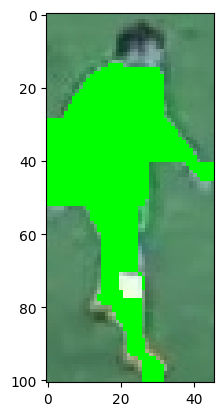

In [94]:
# plt.imshow(opening)
plt.imshow(outlined_image)

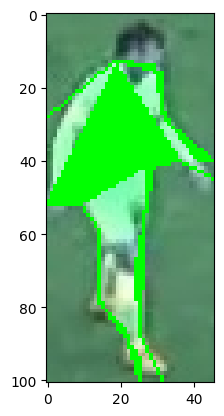

In [60]:
edges = cv2.Canny(opening, 50, 150)
    
# Find contours of the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Combine all contours
all_contours = np.vstack(contours)

# Simplify the combined contour
epsilon = 0.005 * cv2.arcLength(all_contours, True)
approx = cv2.approxPolyDP(all_contours, epsilon, True)

# Convert the contour to a list of coordinates
coordinates = all_contours.reshape(-1, 2).tolist()
img = cv2.imread(img_path)
cv2.drawContours(img, [approx], -1, (0, 255, 0), cv2.FILLED)
# for point in coordinates:
#         cv2.circle(img, tuple(point), 2, (0, 255, 0), -1)

plt.imshow(img)
# cv2.imshow('Player Edges', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

        

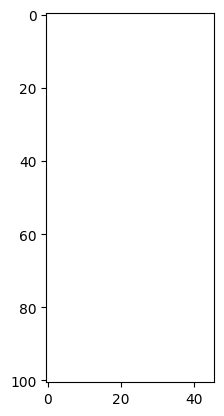

In [67]:
image = cv2.imread(img_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range for segmentation (adjust these values as needed)
lower_color = np.array([30, 40, 40])
upper_color = np.array([90, 255, 255])

# Create a binary mask where the color range is met
mask = cv2.inRange(hsv, lower_color, upper_color)

# Perform morphological operations to remove small noise and fill gaps
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an output image to draw the segmented player
output = np.zeros_like(image)
outlined = image.copy()
# Draw the contours on the output image
cv2.drawContours(outlined, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Bitwise-and the output image with the original image
# segmented_player = cv2.bitwise_and(image, output)

# Show the result
plt.imshow(outlined)
# cv2.imshow("Segmented Player", segmented_player)
# cv2.waitKey(0)
# cv2.destroyAllWindows()